In [24]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob as gb
import numpy as np


In [25]:
path = os.getcwd()+ '/archive/car_data/car_data'

In [26]:
train = path+"/train"
test = path+"/test"
train_labels = []
train_images = []
test_labels = []
test_images = []


In [27]:
train_path =  [folder for folder in os.listdir(train) if not folder.startswith('.')]
test_path =  [folder for folder in os.listdir(test) if not folder.startswith('.')]


## get # of photos for train & test
train_len = -1
for i in os.walk(train, topdown=True):
        train_len += len(i[2]) 

test_len = -1
for i in os.walk(test, topdown=True):
        test_len += len(i[2]) 

## add the type of cars into dict
d = dict()
idx = 0
for folder in test_path:
    d[folder] = idx
    idx+= 1

In [28]:
# Get image annotations
# Heading names: img_name, bbox_x1, bbox_y1, bbox_x2, bbox_y2, class
train_annot = pd.read_csv(os.getcwd() + "/archive/anno_train.csv")
test_annot = pd.read_csv(os.getcwd() + "/archive/anno_test.csv")

train_bboxes = []
test_bboxes = []

train_annot.keys()

Index(['00001.jpg', '39', '116', '569', '375', '14'], dtype='object')

In [29]:
for folder in test_path:
    jpg_path = gb.glob(pathname = test + "/" + folder + "/*.jpg")
    
    for img in jpg_path:
        img_name = os.path.basename(img)
        image = cv2.imread(img)
        test_labels.append(np.array(d[folder]))
        image = cv2.resize(image, (224,224))
        test_images.append(np.array(image))

for folder in train_path:
    jpg_path = gb.glob(pathname = train + "/" + folder + "/*.jpg")
    
    for img in jpg_path:
        img_name = os.path.basename(img)
        image = cv2.imread(img)
        train_labels.append(np.array(d[folder]))
        image = cv2.resize(image, (224,224))
        train_images.append(np.array(image))
        

In [30]:
train_labels = np.array(train_labels)
train_labels = np.reshape(train_labels, (-1, 1))

test_labels = np.array(test_labels)
test_labels = np.reshape(test_labels, (-1, 1))

train_images = np.array(train_images)
test_images = np.array(test_images)


In [31]:
print(test_labels)
print(test_labels.shape)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]


In [32]:
train_images, test_images= train_images / 255.0, test_images/ 255.0


In [33]:
from keras import layers
from keras.models import Model
from keras.applications import VGG16
model = VGG16(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(224, 224, 3)))

model.trainable=False

flatten = model.output
flatten = layers.Flatten() (flatten)

In [34]:
# Second fully connected layer header for predicting class label
label_output = layers.Dense(512, activation="relu")(flatten)
label_output = layers.Dropout(0.5) (label_output)
label_output = layers.Dense(512, activation="relu") (label_output)
label_output = layers.Dropout(0.5) (label_output)
label_output = layers.Dense(10, activation="softmax", name="class_label") (label_output)

model = Model(inputs=model.input, outputs=(label_output))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
for folder in train_path:
    jpg_path = gb.glob(pathname = test + "/" + folder + "/*.jpg")
    
    for img in jpg_path:
        img_name = os.path.basename(img)
        image = cv2.imread(img)
        np.append(test_labels,np.array(folder))
        image = cv2.resize(image, (224,224))
        np.append(test_images,np.array(image))

In [36]:
# Set losses for both fully-connected layer headers
from keras.losses import SparseCategoricalCrossentropy

losses = {
    "class_label": SparseCategoricalCrossentropy(from_logits=False)
}
lossWeights = {
    "class_label": 1.0
}

# Set targets
train_targets = {
    "class_label": train_labels
}

test_targets = {
    "class_label": test_labels
}

In [37]:
model.compile(optimizer='adam',
              loss=losses, loss_weights=lossWeights,
              metrics=['accuracy'])

history = model.fit(train_images, train_targets, epochs=10,
                    validation_data=(test_images, test_targets), batch_size=32, verbose=1)

Epoch 1/10
13/13 [==============================] - 54s 4s/step - loss: 5.0823 - accuracy: 0.1039 - val_loss: 2.2889 - val_accuracy: 0.2836
Epoch 2/10
13/13 [==============================] - 52s 4s/step - loss: 2.4767 - accuracy: 0.1908 - val_loss: 2.1011 - val_accuracy: 0.3056
Epoch 3/10
13/13 [==============================] - 50s 4s/step - loss: 2.1134 - accuracy: 0.2391 - val_loss: 2.0129 - val_accuracy: 0.4279
Epoch 4/10
13/13 [==============================] - 51s 4s/step - loss: 1.8987 - accuracy: 0.3551 - val_loss: 1.8293 - val_accuracy: 0.4254
Epoch 5/10
13/13 [==============================] - 51s 4s/step - loss: 1.6788 - accuracy: 0.4203 - val_loss: 1.7049 - val_accuracy: 0.4597
Epoch 6/10
13/13 [==============================] - 50s 4s/step - loss: 1.4989 - accuracy: 0.4783 - val_loss: 1.4488 - val_accuracy: 0.5501
Epoch 7/10
13/13 [==============================] - 49s 4s/step - loss: 1.3001 - accuracy: 0.5217 - val_loss: 1.4791 - val_accuracy: 0.4939
Epoch 8/10
13/13 [==

In [38]:
model.trainable=True

model.summary()

13/13 [==============================] - 24s 2s/step


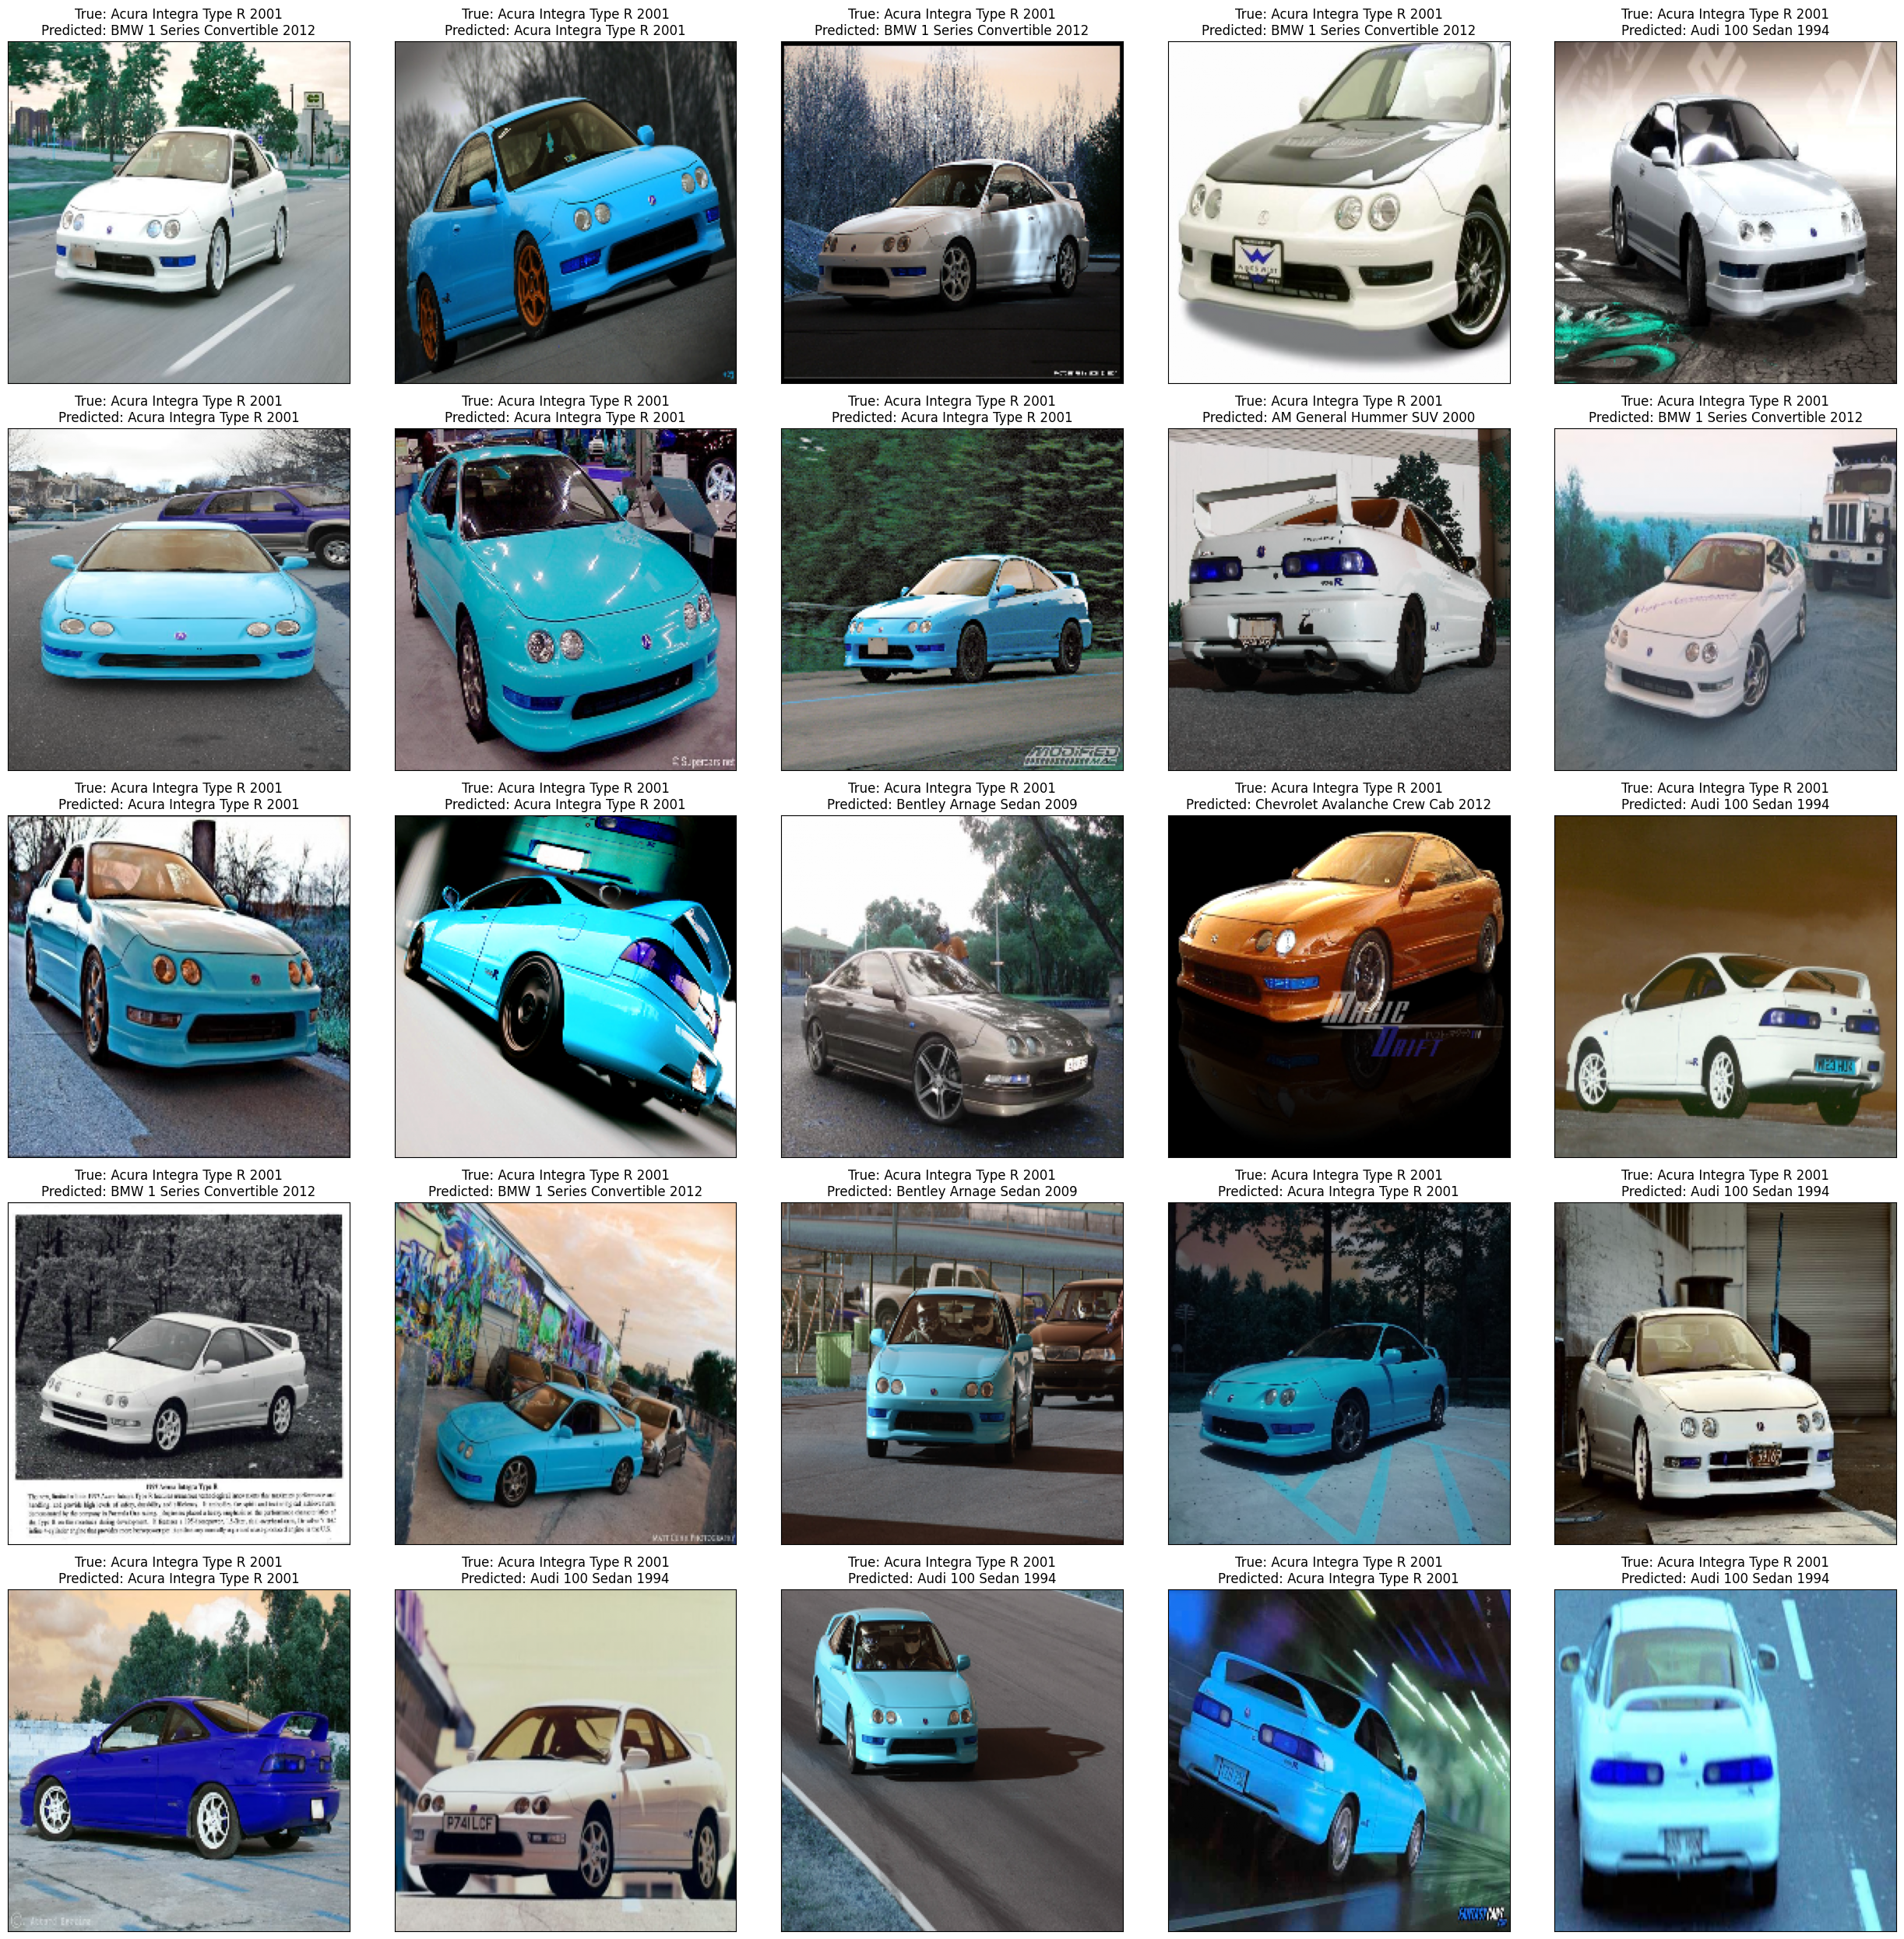

In [39]:
y_pred = model.predict(test_images)
pred_label = np.argmax(y_pred,axis = 1)
plt.figure(figsize=(25,25))

def getLabel(i):
    return (list(d.keys())[list(d.values()).index(i)])  

for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title("True: " + getLabel(test_labels[i][0]) + "\n" + "Predicted: " + getLabel(pred_label[i]))
plt.tight_layout()
plt.show()

In [40]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=32)

print('acc', acc)
print("loss", loss)

13/13 [==============================] - 25s 2s/step - loss: 1.2726 - accuracy: 0.5844
acc 0.5843520760536194
loss 1.2726231813430786


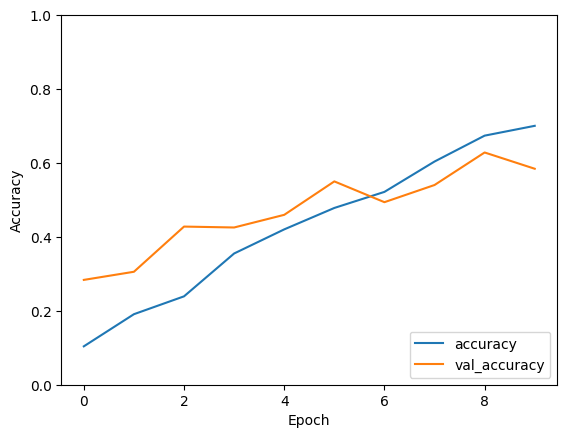

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')